**Web Scraping of MagicBricks (Property Dealing Site)**

---



In [ ]:
## Required imports

! pip install fake_useragent
from fake_useragent import UserAgent
import pandas as pd
import bs4
import requests
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=56d533913043894db81516aff1f62fc97b26d7ef98e9c837f0349df72fe4e547
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built fake-useragent


In [ ]:
## Variable Intialization & empty data frame creation

df = pd.DataFrame()
price = []
overview = []
bhk = []
locality = []
builder = []
summary = []
area = []
status= []
floor = []
transaction = []
furnishing = []
facing = []
overlooking = []
society = []
car_parking = []
bathroom = []
balcony = []
ownership = []
property_details_temp = []
property_details = ['carpet area','status','floor','transaction','furnishing','facing','overlooking','society','car parking','bathroom','balcony','ownership']

In [ ]:
def getBHK(bhk_t):
    bhk= "" 
    bhkRegex = re.compile(r'\d+\s+')
    property_bhk_search = bhkRegex.search(bhk_t)
    if property_bhk_search:
      bhk = property_bhk_search.group()
    else:
      bhk = 'Nan'
   
    return bhk

print(getBHK("2 BHK Villa  for Sale in Malhaar Exotica, Sardar Patel Ring Road"))

2 


In [ ]:
def getLocality(locality_t):
    locality= "" 
    localityRegex = re.compile(r'Sale in(.*)$')
    property_locality_search = localityRegex.search(locality_t)
    if property_locality_search:
      locality = property_locality_search.group(1)
    else:
      locality = 'Nan'
   
    return locality

print(getLocality("2 BHK Villa for Sale in Malhaar Exotica, Sardar Patel Ring Road"))

 Malhaar Exotica, Sardar Patel Ring Road


In [ ]:
def getBrand(brand_t):
    brand = "" 
    brandRegex = re.compile(r'\w+\s')
    brand_search = brandRegex.search(brand_t)
    if brand_search:
      brand = brand_search.group()
    else:
      brand = 'Nan'
   
    return brand

print(getBrand("Apple Watch Series 3 GPS - 42 mm Space Grey Aluminium Case with Black Sport Band  (Black Strap, Regular)"))

Apple 


In [ ]:
def getSize(Size_t):
    size = "" 
    sizeRegex = re.compile(r'(\d+\s)mm')
    brand_search = sizeRegex.search(Size_t)
    if brand_search:
      size = brand_search.group()
    else:
      size = 'Nan'
   
    return size

print(getSize("Apple Watch Series 33 GPS - 42 mm Space Grey Aluminium Case with Black Sport Band  (Black Strap, Regular)"))

42 mm


In [ ]:
def getPrice(price_t):
    price= "" 
    priceRegex = re.compile(r'\s\d.+')
    price_search = priceRegex.search(price_t)
    if price_search:
      price = price_search.group()
      if 'Cr' in price:
        price_temp = price.replace("Cr", "")
        price = float(price_temp) * 100
      elif 'Lac' in price:
        price_temp = price.replace("Lac", "")
        price = float(price_temp)
    else:
      price = '0'
   
    return price

print(getPrice("₹ 61.5 Lac"))

61.5


In [ ]:
## Actual Logic
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
user_agent = UserAgent()
count = 0

for i in range(1,6):
  url = "https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Residential-House,Villa,Residential-Plot&cityName=Ahmedabad".format(i);
  r = requests.get(url, headers=headers)
  soup = bs4.BeautifulSoup(r.content, features='lxml')
  for properties in soup.findAll('div',{'class':'flex relative clearfix m-srp-card__container '}):

    property_price = properties.find('div',attrs={'class':'m-srp-card__price'})
    price.append(getPrice(property_price.text.replace("[","").replace("]","").strip()))

    property_name_full = properties.find('span', attrs={'class':'m-srp-card__title'})
    name_full = property_name_full.text.replace("\n", "").replace("\t","").strip()

    property_name = properties.find('span', attrs={'class':'m-srp-card__title__bhk'})
    name = property_name.text.replace("\n", "").replace("\t","").strip()
    overview.append(name)

    builder_name = properties.find('div', attrs={'class':'m-srp-card__advertiser__name'})
    builder.append(builder_name.text.replace("[","").replace("]","").strip())
   
    bhk.append(getBHK(name))
    
    locality.append(getLocality(name_full))

    for summary_item in properties.findAll('div', attrs={'class':'m-srp-card__summary js-collapse__content'}):

      summary_titles = summary_item.findAll('div', attrs={'class':'m-srp-card__summary__title'})
      summary_info = summary_item.findAll('div', attrs={'class':'m-srp-card__summary__info'})

      for i in range(len(summary_titles)):
        if i == 0:
          property_details_temp = []

        if 'carpet area' in summary_titles[i]:
          area.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip())
          property_details_temp.append('carpet area')
        elif 'status' in summary_titles[i]:
          status.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("status",""))
          property_details_temp.append('status')
        elif 'floor' in summary_titles[i]:
          floor.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip())
          property_details_temp.append('floor')
        elif 'transaction' in summary_titles[i]:
          transaction.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("transaction",""))
          property_details_temp.append('transaction')
        elif 'furnishing' in summary_titles[i]:
          furnishing.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("furnishing",""))
          property_details_temp.append('furnishing')
        elif 'facing' in summary_titles[i]:
          facing.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("facing",""))
          property_details_temp.append('facing')
        elif 'overlooking' in summary_titles[i]:
          overlooking.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("overlooking",""))
          property_details_temp.append('overlooking')
        elif 'society' in summary_titles[i]:
          society.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("society",""))
          property_details_temp.append('society')
        elif 'car parking' in summary_titles[i]:
          car_parking.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("car parking",""))
          property_details_temp.append('car parking')
        elif 'bathroom' in summary_titles[i]:
          bathroom.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("bathroom",""))
          property_details_temp.append('bathroom')
        elif 'balcony' in summary_titles[i]:
          balcony.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip())
          property_details_temp.append('balcony')
        elif 'ownership' in summary_titles[i]:
          ownership.append(summary_info[i].text.strip() + " " + summary_titles[i].text.strip().replace("ownership",""))
          property_details_temp.append('ownership')

        if i+1 == len(summary_titles):
          remainingSummeries = list(set(property_details).difference(property_details_temp))
          for remainingSummery in remainingSummeries :
            if 'carpet area' in remainingSummery:
              area.append('Nan')
            elif 'status' in remainingSummery:
              status.append('Nan')
            elif 'floor' in remainingSummery:
              floor.append('Nan')
            elif 'transaction' in remainingSummery:
              transaction.append('Nan')
            elif 'furnishing' in remainingSummery:
              furnishing.append('Nan')
            elif 'facing' in remainingSummery:
              facing.append('Nan')
            elif 'overlooking' in remainingSummery:
              overlooking.append('Nan')
            elif 'society' in remainingSummery:
              society.append('Nan')
            elif 'car parking' in remainingSummery:
              car_parking.append('Nan')
            elif 'bathroom' in remainingSummery:
              bathroom.append('Nan')
            elif 'balcony' in remainingSummery:
              balcony.append('Nan')
            elif 'ownership' in remainingSummery:
              ownership.append('Nan')

    count = count + 1

#print('Total Properties :', count)
#print('Overview=',len(overview),'area=',len(area),'status=',len(status),'floor=',len(floor),'transaction=',len(transaction),'furnishing=',len(furnishing),'facing=',len(facing))
#print('overlooking=',len(overlooking),'society=',len(society),'car_parking=',len(car_parking),'bathroom=',len(bathroom),'ownership=',len(ownership),'price=',len(price))
df = pd.DataFrame({'Property Overview':overview,'Area':area,'BHK':bhk,'Locality':locality,'Status':status,'Floor':floor,'Transaction':transaction,'Furnishing':furnishing,'Facing':facing,
                   'Overlooking':overlooking,'Society':society,'Car parking':car_parking,'Bathroom':bathroom,'Ownership':ownership,'Price(L)':price,'Builder':builder})

df.head()


,Property Overview,Area,BHK,Locality,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Society,Car parking,Bathroom,Ownership,Price(L),Builder
0,3 BHK Apartment,1783 sqft carpet area,3,Thaltej,Ready to Move,Nan,New Property,Unfurnished,East,"Garden/Park, Pool, Main Road",Nan,2 Covered,3,Freehold,158.0,Heaven Space
1,3 BHK Apartment,1085 sqft carpet area,3,"Jagatpur Village, Gota",Ready to Move,Nan,Resale,Unfurnished,North,"Garden/Park, Pool, Main Road",Nan,1 Covered,3,Freehold,61.0,Metro Real Estate
2,2 BHK Apartment,650 sqft carpet area,2,"Sky Sol,South Bopal, Bopal",Ready to Move,9 out of 13 floors floor,Resale,Furnished,East,Main Road,Sky Sol,1 Covered,2,Freehold,49.5,Resolute Property Solution
3,3 BHK Apartment,1209 sqft carpet area,3,Gota,Ready to Move,Nan,New Property,Unfurnished,East,"Garden/Park, Pool, Main Road",Nan,"1 Covered, 1 Open",3,Freehold,80.0,Vital Space Management Private Limited
4,3 BHK Apartment,1500 sqft carpet area,3,"Indraprasth 5,Prahlad Nagar",Ready to Move,3 out of 5 floors floor,Resale,Unfurnished,East,Garden/Park,Indraprasth 5,1 Covered,3,Freehold,115.0,H2O Property Solutions


In [ ]:
df.tail()

,Property Overview,Area,BHK,Locality,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Society,Car parking,Bathroom,Ownership,Price(L),Builder
145,1 BHK Villa,Nan,1,"Malhaar Exotica,Sardar Patel Ring Road",Ready to Move,Nan,New Property,Unfurnished,Nan,"Garden/Park, Pool, Main Road",Malhaar Exotica,1 Open,1,Freehold,24.0,Malhaar Exotica
146,3 BHK Apartment,Nan,3,"Shilp Shaligram,Vastrapur",Possession by Jun '22,1 out of 10 floors floor,New Property,Unfurnished,Nan,Nan,Shilp Shaligram,Nan,3,Nan,121.0,Shilp Group
147,3 BHK Apartment,Nan,3,"Rajvi Opal,Naranpura",Possession by Nov '21,Nan,New Property,Unfurnished,Nan,Nan,Rajvi Opal,2 Covered,3,Nan,108.0,Shivam Builders Pvt Ltd
148,3 BHK Apartment,Nan,3,"Ekta Festival,Naranpura",Possession by Mar '22,Nan,New Property,Unfurnished,Nan,Nan,Ekta Festival,2 Covered,3,Nan,112.0,Anand Patel
149,3 BHK Apartment,1191 sqft carpet area,3,"Polaris Celestia,Koteshwar",Possession by Jul '23,Nan,New Property,Unfurnished,Nan,Nan,Polaris Celestia,Nan,3,Nan,86.7,Polaris Group


In [ ]:
# Generate .csv file for scrapped data

df.to_csv('property_ahmedabad.csv', index=False)

In [ ]:
# Data Cleaning

#df.drop_duplicates()

#df.reset_index()

df.shape

(150, 16)

In [ ]:
df["Price(L)"] = df["Price(L)"].astype(float)
df["Bathroom"] = df["Bathroom"].astype(int)

In [ ]:
## Getting information of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Overview  150 non-null    object 
 1   Area               150 non-null    object 
 2   BHK                150 non-null    object 
 3   Locality           150 non-null    object 
 4   Status             150 non-null    object 
 5   Floor              150 non-null    object 
 6   Transaction        150 non-null    object 
 7   Furnishing         150 non-null    object 
 8   Facing             150 non-null    object 
 9   Overlooking        150 non-null    object 
 10  Society            150 non-null    object 
 11  Car parking        150 non-null    object 
 12  Bathroom           150 non-null    int64  
 13  Ownership          150 non-null    object 
 14  Price(L)           150 non-null    float64
 15  Builder            150 non-null    object 
dtypes: float64(1), int64(1), o

In [ ]:
df.describe()

,Bathroom,Price(L)
count,150.000000,150.000000
mean,2.666667,110.766667
std,0.598282,95.247330
min,1.000000,13.500000
25%,2.000000,54.000000
50%,3.000000,95.500000
75%,3.000000,133.000000
max,3.000000,530.000000


In [ ]:
## Sorting based on price asceding

df.sort_values(by='Price(L)', ascending=True).head()

,Property Overview,Area,BHK,Locality,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Society,Car parking,Bathroom,Ownership,Price(L),Builder
82,1 BHK Apartment,Nan,1,"Rashmi Vihar,Narolgam",Ready to Move,Nan,New Property,Unfurnished,Nan,Nan,Rashmi Vihar,Nan,1,Nan,13.5,Nitesh Vasava
22,1 BHK Apartment,Nan,1,"Rashmi Vihar,Narolgam",Ready to Move,Nan,New Property,Unfurnished,Nan,Nan,Rashmi Vihar,Nan,1,Nan,13.5,Nitesh Vasava
142,1 BHK Apartment,Nan,1,"Rashmi Vihar,Narolgam",Ready to Move,Nan,New Property,Unfurnished,Nan,Nan,Rashmi Vihar,Nan,1,Nan,13.5,Nitesh Vasava
52,1 BHK Apartment,Nan,1,"Rashmi Vihar,Narolgam",Ready to Move,Nan,New Property,Unfurnished,Nan,Nan,Rashmi Vihar,Nan,1,Nan,13.5,Nitesh Vasava
112,1 BHK Apartment,Nan,1,"Rashmi Vihar,Narolgam",Ready to Move,Nan,New Property,Unfurnished,Nan,Nan,Rashmi Vihar,Nan,1,Nan,13.5,Nitesh Vasava


In [ ]:
## Checks different counts of (Apartement/Villa) for (1/2/3) BHK

df_property = df['Property Overview'].value_counts()
df_property

3 BHK Apartment    105
2 BHK Apartment     25
3 BHK Villa         10
1 BHK Villa          5
1 BHK Apartment      5
Name: Property Overview, dtype: int64

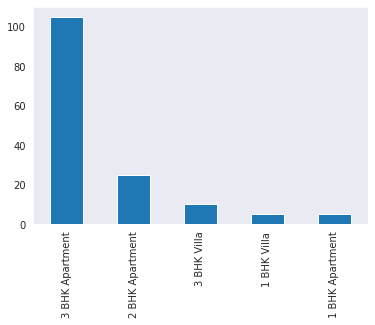

In [ ]:
# This bar plot above shows residential plots are the type of properties that are mostly found in Ahmedabad

df_property.plot.bar();

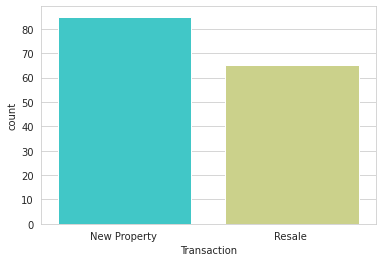

In [ ]:
#The plot depicts that there 2 categories in Transaction which are New property transaction & Resale transaction

sns.set_style('whitegrid')
sns.countplot(x='Transaction',data=df,palette='rainbow');

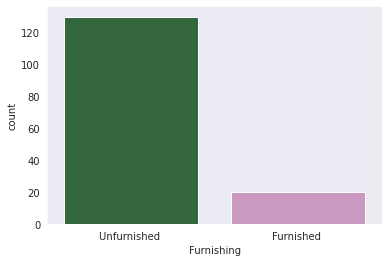

In [ ]:
#The plot depicts that there 2 categories in Furnishing i.e. Unfurnished, Furnished

sns.set_style('dark')
sns.countplot(x='Furnishing',data=df,palette='cubehelix');

In [ ]:
# Specified Price range 25 to 50 Lacs and printing it's first 5 values 

df_property_range = df[(df['Price(L)'] >= 25.00) & (df['Price(L)'] <= 50.00)]
df_property_range.head()

,Property Overview,Area,BHK,Locality,Status,Floor,Transaction,Furnishing,Facing,Overlooking,Society,Car parking,Bathroom,Ownership,Price(L),Builder
2,2 BHK Apartment,650 sqft carpet area,2,"Sky Sol,South Bopal, Bopal",Ready to Move,9 out of 13 floors floor,Resale,Furnished,East,Main Road,Sky Sol,1 Covered,2,Freehold,49.5,Resolute Property Solution
16,2 BHK Apartment,847 sqft carpet area,2,"Savvy Swaraj,Jagatpur",Ready to Move,3 out of 13 floors floor,Resale,Unfurnished,North - East,"Garden/Park, Pool, Main Road",Savvy Swaraj,1 Open,2,Freehold,44.0,The Propking Realty
20,2 BHK Apartment,Nan,2,"Sarvesh,Ranip",Nan,Nan,New Property,Unfurnished,Nan,Nan,Sarvesh,Nan,2,Nan,38.6,Bakeri Group
21,3 BHK Apartment,Nan,3,"Suryam Ananta,Vastral",Possession by Jun '24,Nan,New Property,Unfurnished,Nan,Nan,Suryam Ananta,Nan,3,Nan,45.7,Suryam Group
24,3 BHK Apartment,721 sqft carpet area,3,Vaishno Devi,Possession by Jun '23,2 out of 12 floors floor,New Property,Unfurnished,East,Main Road,Nan,1 Covered,2,Freehold,49.0,Ganesh Housing Corporation Ltd.


In [ ]:
## Displayed the filtered properties that is 25 from 150

df_property_range.shape

(25, 16)

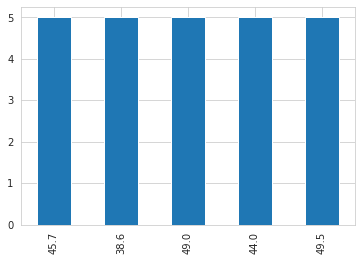

In [ ]:
df_low_property = df_property_range['Price(L)'].value_counts()
df_low_property.plot.bar();

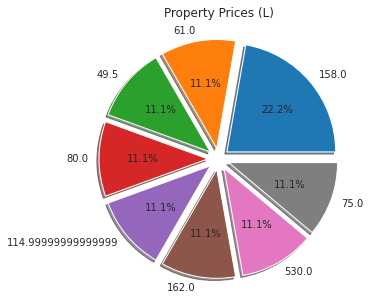

In [ ]:
## Pie chart

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
labels = df['Price(L)'].head(8)
plt.pie(df['Price(L)'].value_counts().head(8), explode, labels=labels, shadow=True, autopct='%1.1f%%');
ax.set_title("Property Prices (L)")
plt.show();

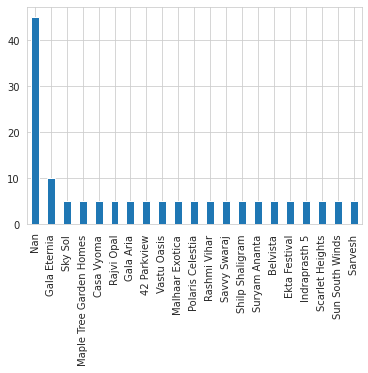

In [ ]:
## Society wise bar

df_Society = df['Society'].value_counts()
df_Society.plot.bar()

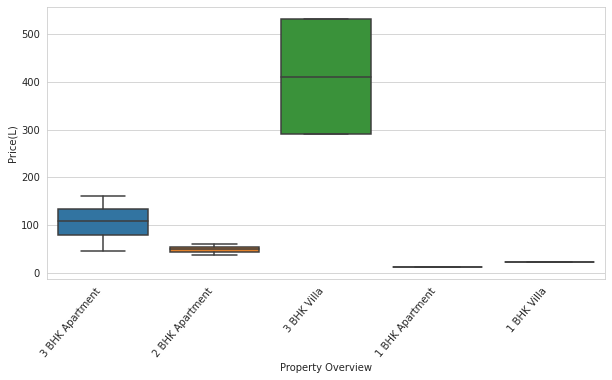

In [ ]:
## Property vs price

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y='Price(L)', x='Property Overview', data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')
plt.show()

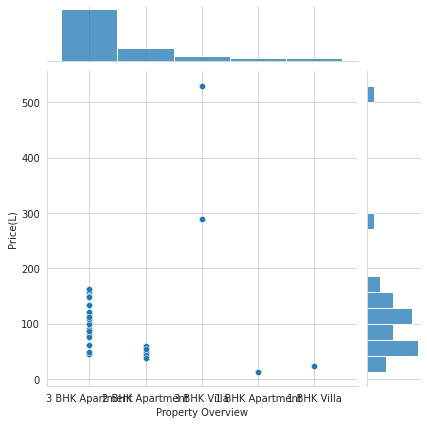

In [ ]:
sns.jointplot(y='Price(L)', x='Property Overview', data=df)

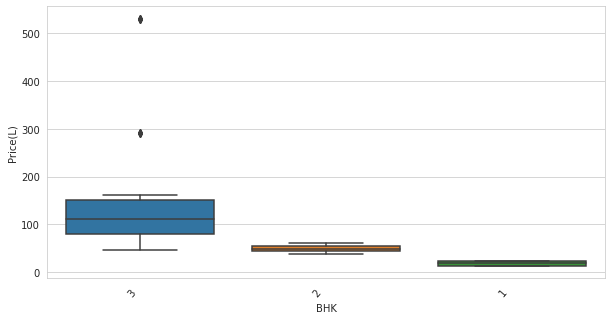

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y='Price(L)', x='BHK', data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')
plt.show()

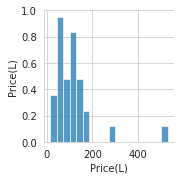

In [ ]:
sns.pairplot(df,kind='reg');